In [ ]:
from google.colab import drive

In [ ]:
import tensorflow

In [ ]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
tensorflow.__version__

'2.2.0'

In [ ]:
train_dir='/content/drive/My Drive/fruits-360/Training'
test_dir='/content/drive/My Drive/fruits-360/Test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
igen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_gen=igen.flow_from_directory(directory=train_dir,target_size=(128,128),classes=['Apple','Banana','Cherry','Lemon','Onion','Plum','Potato','Strawberry','Tomato','Walnut'],class_mode='sparse',batch_size=32)

Found 7935 images belonging to 10 classes.


In [ ]:
test_gen=igen.flow_from_directory(directory=test_dir,target_size=(128,128),classes=['Apple','Banana','Cherry',
                                            'Lemon','Onion','Plum','Potato',
                                            'Strawberry','Tomato','Walnut'],class_mode='sparse',batch_size=32)

Found 2000 images belonging to 10 classes.


In [ ]:
model=Sequential()

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.3))
model.add(Flatten())
model.add(Dense(units=4096,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
# vgg16 model 
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',input_shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same'))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same'))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same'))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(.3))

model.add(Flatten())
model.add(Dropout(.3))
model.add(Dense(units=4096,activation='relu'))

model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       7

In [ ]:
model.load_weights(checkpoint_dir)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import os
checkpoint_path='/content/fruits_model'
checkpoint_dir=os.path.dirname(checkpoint_path)

In [ ]:
cp_callbacks=tensorflow.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

In [ ]:
history=model.fit_generator(generator=train_gen,steps_per_epoch=len(train_gen),
                            epochs=10,validation_data=test_gen,validation_steps=len(test_gen),callbacks=[cp_callbacks])

Epoch 1/10
248/248 [==============================] - ETA: 0s - loss: 0.1906 - accuracy: 0.9530
Epoch 00001: saving model to /content/fruits_model
248/248 [==============================] - 36s 146ms/step - loss: 0.1906 - accuracy: 0.9530 - val_loss: 0.2689 - val_accuracy: 0.9310
Epoch 2/10
248/248 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9946
Epoch 00002: saving model to /content/fruits_model
248/248 [==============================] - 41s 165ms/step - loss: 0.0155 - accuracy: 0.9946 - val_loss: 0.0806 - val_accuracy: 0.9775
Epoch 3/10
248/248 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9943
Epoch 00003: saving model to /content/fruits_model
248/248 [==============================] - 47s 188ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.1082 - val_accuracy: 0.9635
Epoch 4/10
248/248 [==============================] - ETA: 0s - loss: 0.0654 - accuracy: 0.9849
Epoch 00004: saving model to /content/fruits_model
248/248 [=

In [ ]:
value=history.history

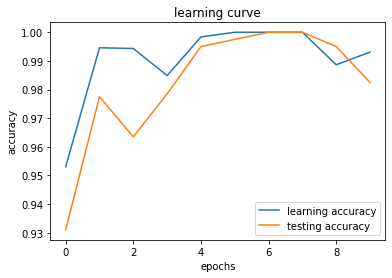

In [ ]:
import matplotlib.pyplot as plt
plt.plot(value['accuracy'],label='learning accuracy')
plt.plot(value['val_accuracy'],label='testing accuracy')
plt.title('learning curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

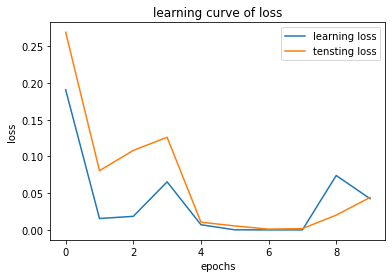

In [ ]:
plt.plot(value['loss'],label='learning loss')
plt.plot(value['val_loss'],label='tensting loss')
plt.title('learning curve of loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
 fruits_model = 'classifier.pt'
path = F"/content/gdrive/My Drive/{fruits_model}" 
torch.save(model., path)

TypeError: ignored

In [ ]:
model.save('fruits_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: fruits_model/assets


In [ ]:
!ls {checkpoint_dir}

checkpoint    fruits_model.data-00000-of-00002	sample_data
drive	      fruits_model.data-00001-of-00002	saved_model.pb
fruits_model  fruits_model.index
